# Linear Regression to Predict House Prices

- Import Data
- Explore Data
- Clean Data
- Feature Engineering + Selection
- Train
- Validate
- Test

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.feature_selection as sk
import sklearn.preprocessing as skp
import sklearn.model_selection as skm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statistics import mean
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('/Users/felixambrose/Downloads/house-prices-advanced-regression-techniques/train.csv')
#test_df = pd.read_csv('/Users/felixambrose/Downloads/house-prices-advanced-regression-techniques/test.csv')

In [2]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
y = df['SalePrice'] 
X = df.drop('SalePrice', axis = 1)

train_x, test_x, train_y, test_y = skm.train_test_split(X, y, test_size = 0.3, random_state = 42)

In [4]:
#train_x = train_df.drop('SalePrice', axis = 1)


In [5]:
print("no of samples: ", len(train_x))
train_x.head()

no of samples:  1022


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
135,136,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
762,763,60,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,Con,Normal
932,933,20,RL,84.0,11670,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
435,436,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal


In [6]:
train_y.describe()

count      1022.000000
mean     181312.692759
std       77617.461005
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      215000.000000
max      745000.000000
Name: SalePrice, dtype: float64

(array([ 11.,  88., 254., 237., 164., 107.,  68.,  32.,  25.,  14.,  10.,
          4.,   2.,   1.,   2.,   1.,   1.,   0.,   0.,   1.]),
 array([ 34900.,  70405., 105910., 141415., 176920., 212425., 247930.,
        283435., 318940., 354445., 389950., 425455., 460960., 496465.,
        531970., 567475., 602980., 638485., 673990., 709495., 745000.]),
 <BarContainer object of 20 artists>)

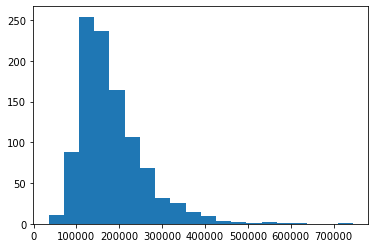

In [7]:
plt.hist(train_y, bins = 20)

In [8]:
for col in train_x.columns:
    if train_x[col].isna().sum() != 0:
        print(col, train_x[col].isna().sum())

LotFrontage 190
Alley 956
MasVnrType 3
MasVnrArea 3
BsmtQual 26
BsmtCond 26
BsmtExposure 26
BsmtFinType1 26
BsmtFinType2 26
Electrical 1
FireplaceQu 487
GarageType 54
GarageYrBlt 54
GarageFinish 54
GarageQual 54
GarageCond 54
PoolQC 1017
Fence 820
MiscFeature 982


In [9]:
# Firstly I narrow down the selected variables to numerical variables

selected_variables = ['GarageArea','LotArea','YearBuilt','YearRemodAdd','1stFlrSF','GrLivArea','GarageCars','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BsmtUnfSF','TotRmsAbvGrd','TotalBsmtSF','OverallQual']
target_label = ['SalePrice']

x_selected_df = train_x[selected_variables]
all_df = train_x[selected_variables]
all_df['SalePrice'] = train_y


for col in x_selected_df.columns:
    print(col, x_selected_df[col].isna().sum())

GarageArea 0
LotArea 0
YearBuilt 0
YearRemodAdd 0
1stFlrSF 0
GrLivArea 0
GarageCars 0
MasVnrArea 3
BsmtFinSF1 0
BsmtFinSF2 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BsmtUnfSF 0
TotRmsAbvGrd 0
TotalBsmtSF 0
OverallQual 0


<ipython-input-9-5123b050acc0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['SalePrice'] = train_y


In [10]:
# Replace missing values with column median

x_selected_df = x_selected_df.fillna(x_selected_df.median())

for col in x_selected_df.columns:
    print(col, x_selected_df[col].isna().sum())

GarageArea 0
LotArea 0
YearBuilt 0
YearRemodAdd 0
1stFlrSF 0
GrLivArea 0
GarageCars 0
MasVnrArea 0
BsmtFinSF1 0
BsmtFinSF2 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BsmtUnfSF 0
TotRmsAbvGrd 0
TotalBsmtSF 0
OverallQual 0


<AxesSubplot:>

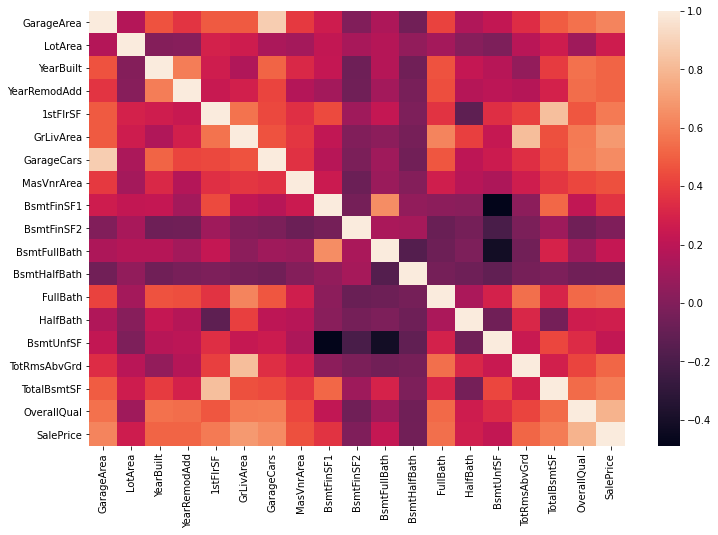

In [12]:
# View correlation of features with SalePrice using Seaborn package + pyplot

correlations = all_df.corr()
f, ax = plt.subplots(figsize = (12,8))
sns.heatmap(correlations)

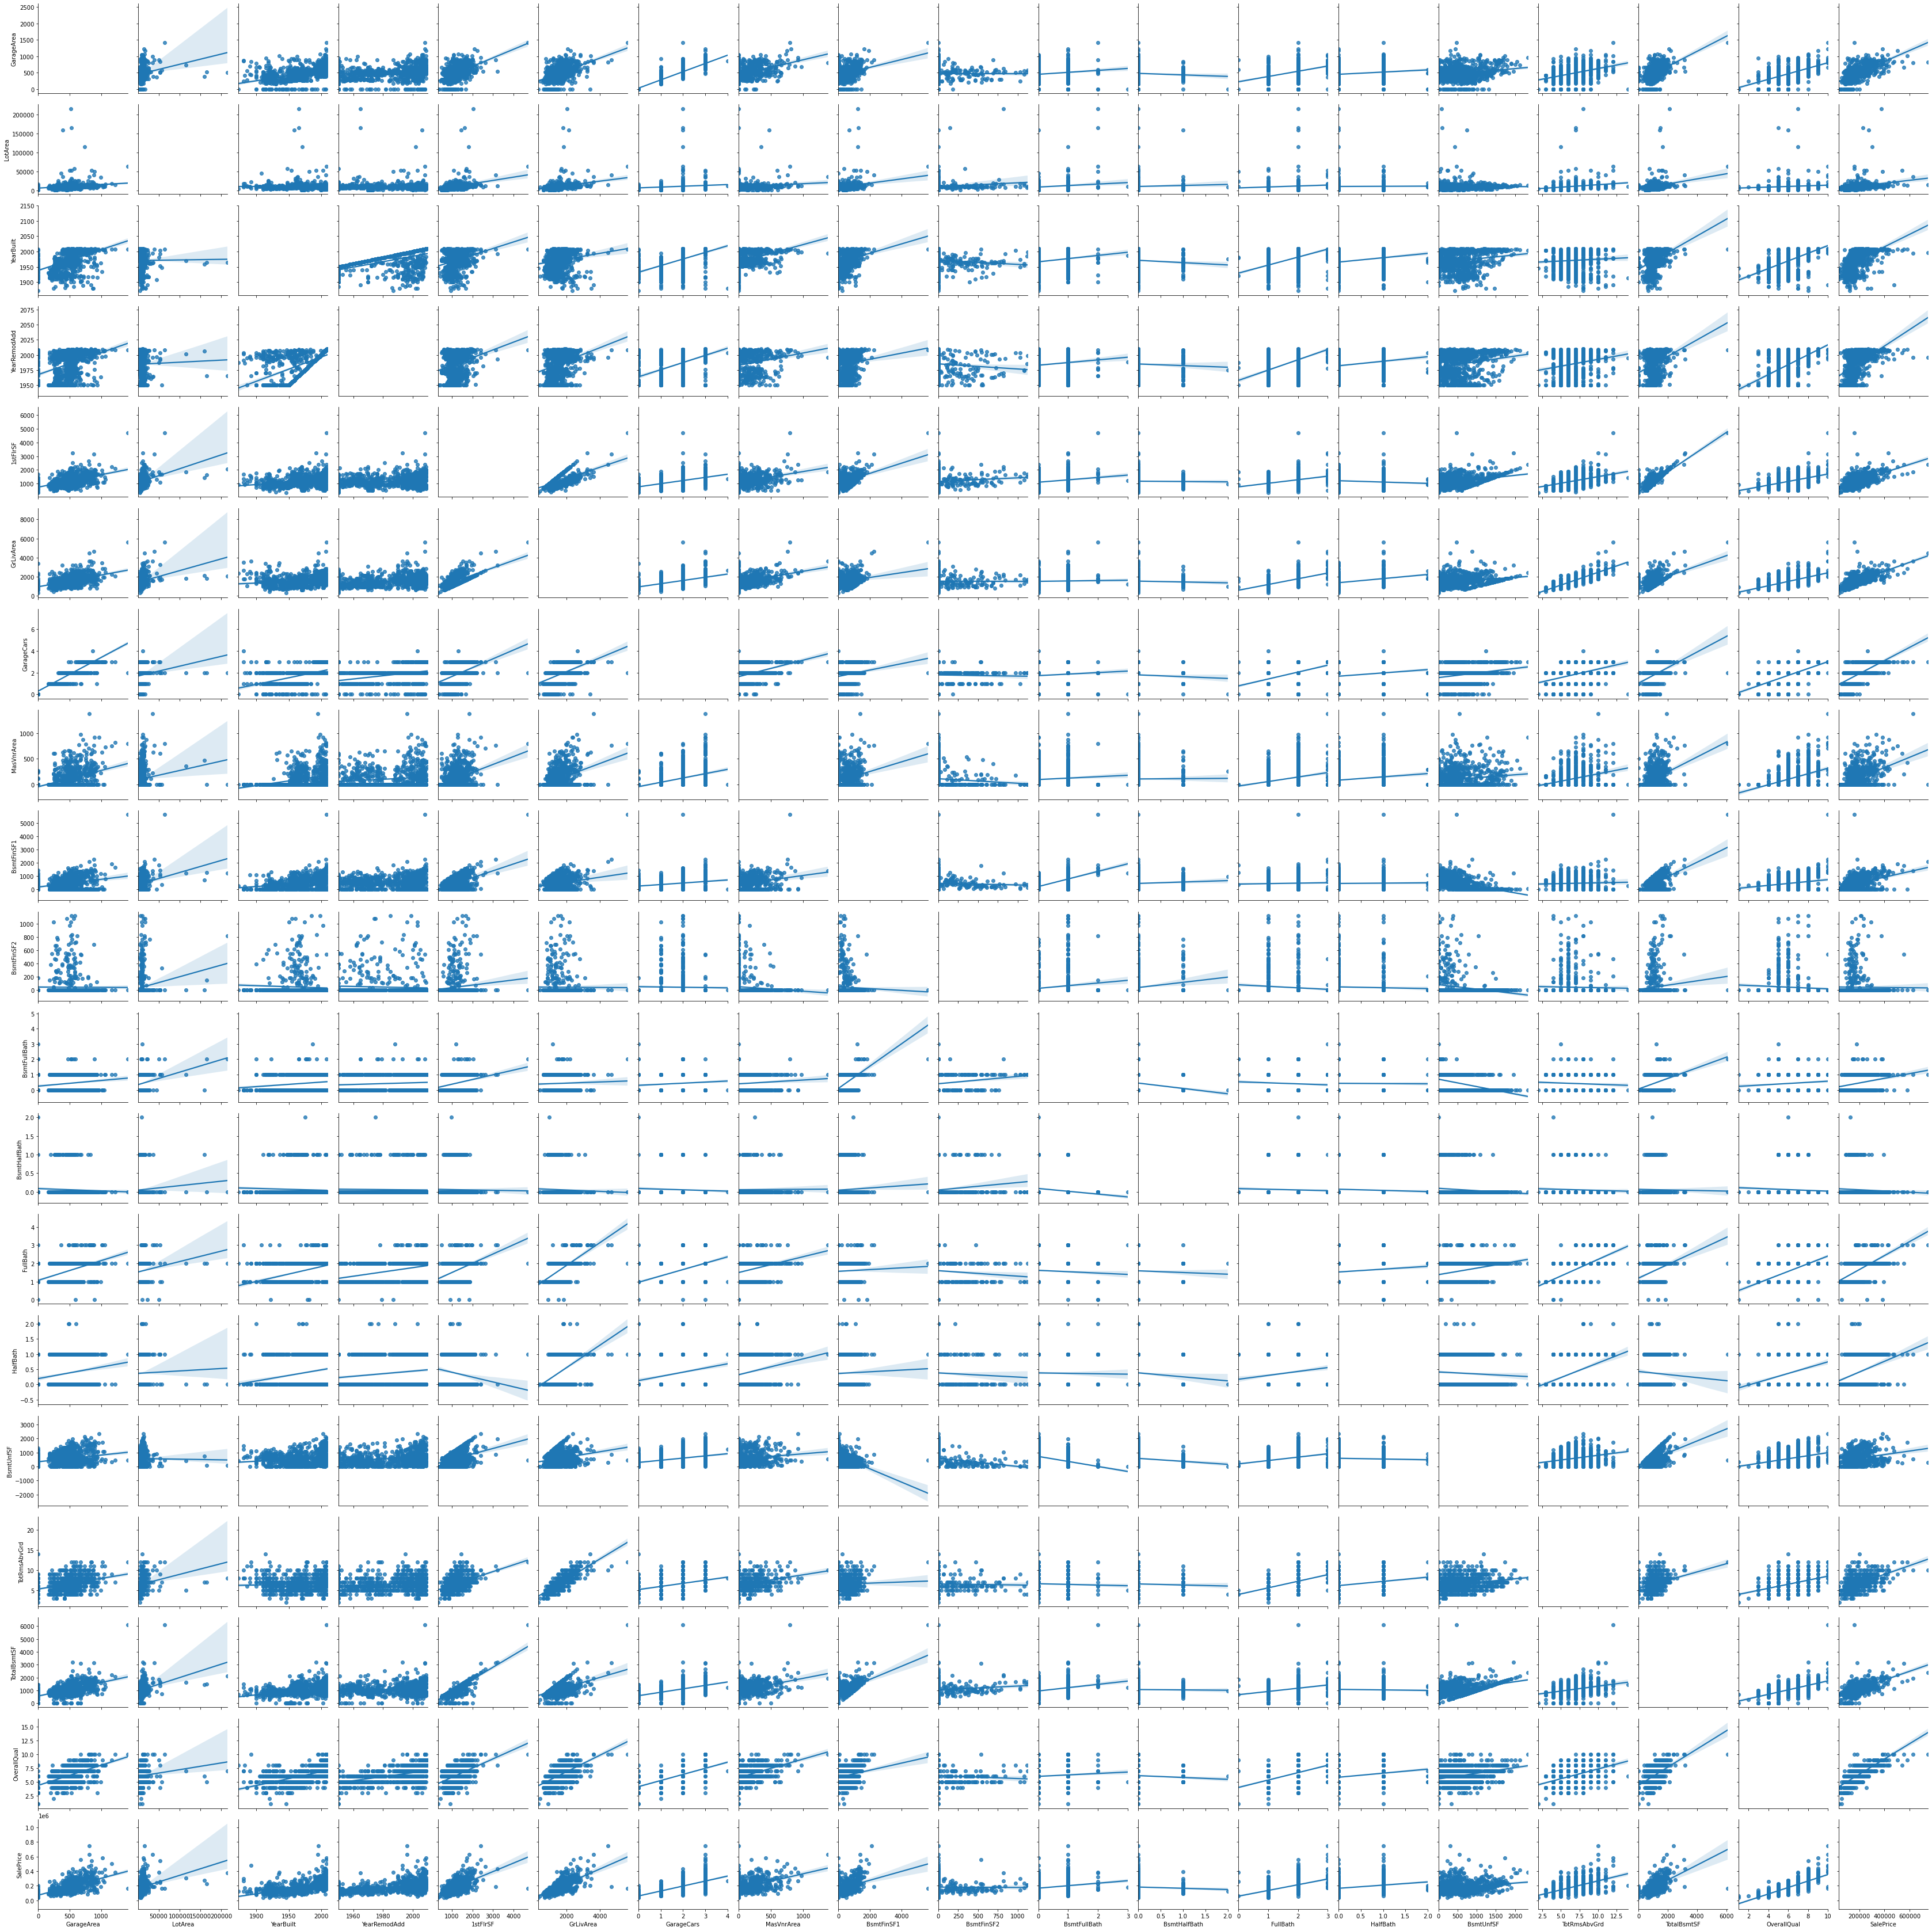

In [13]:
# Create a Pairplot to see further relationships between features

sns.pairplot(all_df, diag_kind = 'kge',kind = 'reg')


In [14]:
# Select variables with linear correlation with sale price


coefficients = []

for column in x_selected_df.columns:
    column_array = x_selected_df[column]
    saleprice_array = all_df['SalePrice']
    coefficients.append([column, np.corrcoef(column_array, saleprice_array)[0][1]])
    
    
corr_variables = []    


min_corr = 0.5

for c in coefficients:
    if c[1] > min_corr:
        corr_variables.append(c[0])


corr_variables

['GarageArea',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'GarageCars',
 'FullBath',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'OverallQual']

<AxesSubplot:>

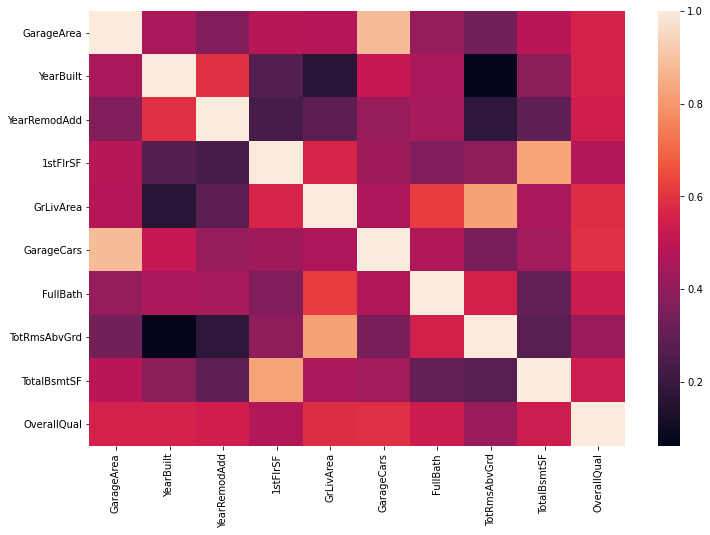

In [15]:
# Again, plot correlation matrix of the features to remove heavily correlated feature variables to avoid overfitting

correlations = all_df[corr_variables].corr()
f, ax = plt.subplots(figsize = (12,8))
sns.heatmap(correlations)

In [16]:
corr_variables = ['GarageArea',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',                  
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'OverallQual']

In [17]:
# Normalise the data

norm_df = (x_selected_df[corr_variables] - x_selected_df[corr_variables].mean())/x_selected_df[corr_variables].std()


In [18]:
#values = x_selected_df[corr_variables].values
#minmax = skp.MinMaxScaler()
#scaled = minmax.fit_transform(values)
#norm_df = pd.DataFrame(scaled, columns = corr_variables)

In [19]:


X = np.array(norm_df)
y = np.array(all_df['SalePrice'])

#x_new  = sk.SelectKBest(sk.f_regression, k = 8).fit_transform(X, y)

In [20]:
X_train, X_val, y_train, y_val = skm.train_test_split(X, y, test_size = 0.2, random_state = 42)


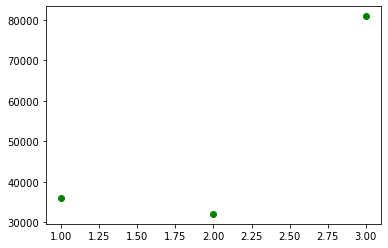

In [22]:
# Here we select the optimum order for the regression model. We can see that the model performs better 
# At order 2 (Polynomial) vs simply linear regression.

mse = []
order_range = [i for i in range(1,4)]

for order in order_range:
    poly = skp.PolynomialFeatures(degree = order)
    poly_x_train = poly.fit_transform(X_train)
    poly_x_val = poly.fit_transform(X_val)

    poly.fit(poly_x_train, y_train)
    regression = LinearRegression()
    regression.fit(poly_x_train, y_train)

    predictions = regression.predict(poly_x_val)

    regression.coef_

    mse.append(mean_squared_error(y_val, predictions, squared = False))
    
plt.scatter(order_range, mse, color = 'green')    


In [23]:
# Printing the MSE for the validation data at order 2

order = 2
poly = skp.PolynomialFeatures(degree = order)

poly_x_train = poly.fit_transform(X_train)
poly_x_val = poly.fit_transform(X_val)

poly.fit(poly_x_train, y_train)
regression = LinearRegression()

regression.fit(poly_x_train, y_train)


predictions = regression.predict(poly_x_val)

regression.coef_

rmse = mean_squared_error(y_val, predictions, squared = False)

print('The validation MSE is: {}'.format(rmse))

The validation MSE is: 32046.541250873343


In [25]:
norm_test_df = (test_x[corr_variables] - test_x[corr_variables].mean())/test_x[corr_variables].std()

X = np.array(norm_test_df)
y = np.array(test_y)

In [26]:
poly_x_val = poly.fit_transform(X)

test_pred = regression.predict(poly_x_val)

test_mse = mean_squared_error(y, test_pred, squared = False)

print('The test MSE is: {}'.format(test_mse))

The test MSE is: 30778.014946383013
